In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.model_selection import cross_validate

In [ ]:
titanic_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Note:**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

<ipython-input-3-2251edd6cb3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap='YlGnBu')


<Axes: >

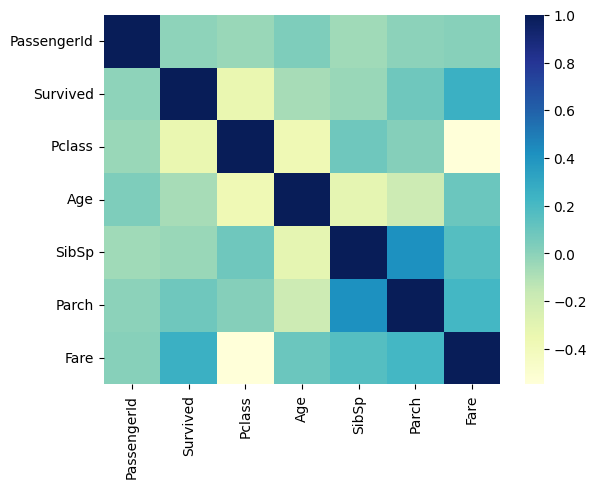

In [ ]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap='YlGnBu')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)

for train_indices, test_indices in split.split(titanic_data,titanic_data[['Survived','Pclass','Sex']]): 
#splitting the train and test set in equal valuable credential or else it might happen that train set have all the surviour and test set left with no survivor
  strat_test_data=titanic_data.loc[test_indices]
  strat_train_data=titanic_data.loc[train_indices]

strat_test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S


<Axes: >

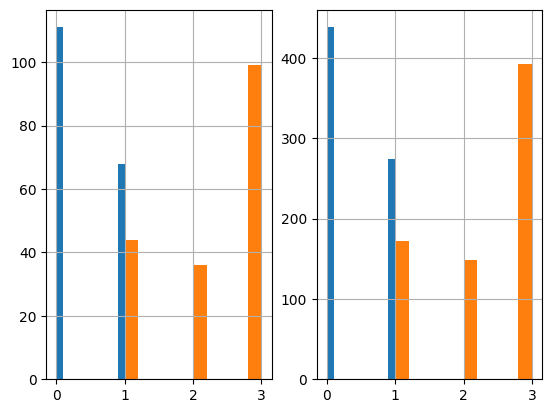

In [ ]:
#For checking if the data distribution between the train and test set is distributed equally or not. 
#From the plot the values show similar variation over the sets so it is good to work with

plt.subplot(1,2,1)
strat_test_data['Survived'].hist() #blue
strat_test_data['Pclass'].hist()   #orange

plt.subplot(1,2,2)
strat_train_data['Survived'].hist()
strat_train_data['Pclass'].hist()

In [ ]:
#To see if the values are missing for any column.
#For age there is multiple values that are missing. Let us impute those values.
#in case of cabin we are going to drop it as the missing values are hight we can say it is not so important for us .

strat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 491 to 354
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          571 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
#imputing data
from sklearn.base import BaseEstimator, TransformerMixin #for fitting we are using BaseEstimator, it is a class
                                                         #TransformerMixin for mixing and transform without defining it explicitly
from sklearn.impute import SimpleImputer #for filling the values that are missing and for strategies we are going to use.
class AgeImputer(BaseEstimator, TransformerMixin):

  def fit(self,X,Y=None):
    return self #to return the base estimator

  def transform(self,X):
    imputer=SimpleImputer(strategy='mean')
    X['Age']=imputer.fit_transform(X[['Age']])
    return X


In [ ]:
#Now doing one hot encoding to feature the values of Embark and Sex into binary

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

  def fit(self,X,Y=None):
    return self #to return the base estimator
    
  def transform(self,X):
    encoder=OneHotEncoder()
    matrix=encoder.fit_transform(X[['Embarked']]).toarray()
    columns_name=['C','S','Q','N']
    for i in range(len(matrix.T)):
      X[columns_name[i]] = matrix.T[i] #changing the format

    matrix=encoder.fit_transform(X[["Sex"]]).toarray()
    columns_name=['female','male']
    for j in range(len(matrix.T)):
      X[columns_name[j]] = matrix.T[j] #changing the format
    return X

In [ ]:
#For dropping the unnecessary columns

class DropFeatures(BaseEstimator, TransformerMixin):

  def fit(self,X,Y=None):
    return self #to return the base estimator
    
  def transform(self,X):
    return X.drop(['Embarked','Name','Ticket','Sex','N','Cabin'],axis=1,errors='ignore')

In [ ]:
#defining the pipeline

from sklearn.pipeline import Pipeline
pipeline=Pipeline([('age Imputer',AgeImputer()),
                   ('feature encoder',FeatureEncoder()),
                   ('drop feature', DropFeatures())])

In [ ]:
strat_train_data=pipeline.fit_transform(strat_train_data) #call all the individual estimator components through the pipleines

In [ ]:
strat_train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
491,492,0,3,21.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
757,758,0,2,18.000000,0,0,11.5000,0.0,0.0,1.0,0.0,1.0
163,164,0,3,17.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
454,455,0,3,29.766497,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
299,300,1,1,50.000000,0,1,247.5208,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
358,359,1,3,29.766497,0,0,7.8792,0.0,1.0,0.0,1.0,0.0
37,38,0,3,21.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
529,530,0,2,23.000000,2,1,11.5000,0.0,0.0,1.0,0.0,1.0
41,42,0,2,27.000000,1,0,21.0000,0.0,0.0,1.0,1.0,0.0


In [ ]:
strat_train_data['Survived']

491    0
757    0
163    0
454    0
299    1
      ..
358    1
37     0
529    0
41     0
354    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
# Now scaling the data

from sklearn.preprocessing import StandardScaler

X=strat_train_data.drop(['Survived'],axis=1)
y=strat_train_data['Survived']

scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [ ]:
X_data #data as numpy array

array([[ 2.08502164e-01,  8.27893418e-01, -6.78064371e-01, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       [ 1.23951028e+00, -3.70196244e-01, -9.10106089e-01, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.06281611e+00,  8.27893418e-01, -9.87453328e-01, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [ 3.55789037e-01, -3.70196244e-01, -5.23369892e-01, ...,
         6.20656111e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.53568450e+00, -3.70196244e-01, -2.13980935e-01, ...,
         6.20656111e-01,  1.35941164e+00, -1.35941164e+00],
       [-3.22505775e-01,  8.27893418e-01, -5.49585191e-16, ...,
        -1.61119819e+00, -7.35612358e-01,  7.35612358e-01]])

In [ ]:
#model selection

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=25, max_features=5),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
   QuadraticDiscriminantAnalysis()
]

# iterate over classifiers

# preprocess dataset, split into training and test part
scoring = ['f1_macro', 'precision_macro', 'recall_macro']
for clf in classifiers:
    scores = cross_validate(clf, X_data, y_data, cv=10, scoring=scoring)
    
    print('Model {}: F1={}; Precision={}; Recall={}\n'.format(clf, scores['test_f1_macro'].mean(), scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean()))



Model LogisticRegression(): F1=0.7715854667434483; Precision=0.7814496862253056; Recall=0.7690730673288813

Model KNeighborsClassifier(n_neighbors=3): F1=0.7628397157519402; Precision=0.771169902380647; Recall=0.7609827510990301

Model SVC(C=0.025, kernel='linear'): F1=0.7692550394802409; Precision=0.7797162425842238; Recall=0.7667041399599539

Model DecisionTreeClassifier(max_depth=5): F1=0.7718031617336365; Precision=0.793925698203929; Recall=0.7667305670212646

Model RandomForestClassifier(max_depth=5, max_features=5, n_estimators=25): F1=0.7924055108747299; Precision=0.8149209711258709; Recall=0.7850386478293455

Model MLPClassifier(alpha=1, max_iter=1000): F1=0.7875773830178022; Precision=0.8127108247775071; Recall=0.7817618320525297

Model AdaBoostClassifier(): F1=0.7776533338725804; Precision=0.7789468522827081; Recall=0.7782796122912402

Model QuadraticDiscriminantAnalysis(): F1=0.4487281333393918; Precision=0.5692535693762425; Recall=0.5322584930143069



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarn

In [ ]:
#As we can see the value is better for random forest so we are going to do that
best_model = RandomForestClassifier() #It make multiple trees to make decision
best_model.fit(X_data, y_data)


RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #cross validation for hyperparameters

paramgrid = [    {'n_estimators': [10, 100, 500], 'max_depth': [None, 10, 50], 'min_samples_split': [2, 3, 4]}
]

gridsearch=GridSearchCV(best_model,paramgrid,cv=3,scoring='accuracy',return_train_score=True)
gridsearch.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 10, 50],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_grid=gridsearch.best_estimator_
final_grid.score(X_data,y_data)

0.9901685393258427

In [ ]:
#fitting on test set

strat_test_data=pipeline.fit_transform(strat_test_data)

In [ ]:
strat_test_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
355,356,0,3,28.00000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
77,78,0,3,29.43007,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
311,312,1,1,18.00000,2,2,262.3750,1.0,0.0,0.0,1.0,0.0
411,412,0,3,29.43007,0,0,6.8583,0.0,1.0,0.0,0.0,1.0
415,416,0,3,29.43007,0,0,8.0500,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
742,743,1,1,21.00000,2,2,262.3750,1.0,0.0,0.0,1.0,0.0
649,650,1,3,23.00000,0,0,7.5500,0.0,0.0,1.0,1.0,0.0
151,152,1,1,22.00000,1,0,66.6000,0.0,0.0,1.0,1.0,0.0
149,150,0,2,42.00000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0


In [ ]:
# Now scaling the data

from sklearn.preprocessing import StandardScaler

X_test=strat_test_data.drop(['Survived'],axis=1)
y_test=strat_test_data['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [ ]:
X_data_test

array([[-0.48080263,  0.82534717, -0.10791931, ...,  0.61394061,
        -0.74600385,  0.74600385],
       [-1.58545661,  0.82534717,  0.        , ...,  0.61394061,
        -0.74600385,  0.74600385],
       [-0.65563995, -1.55750997, -0.86256289, ..., -1.62882204,
         1.34047566, -1.34047566],
       ...,
       [-1.29141202, -1.55750997, -0.56070546, ...,  0.61394061,
         1.34047566, -1.34047566],
       [-1.29935917, -0.3660814 ,  0.94858171, ...,  0.61394061,
        -0.74600385,  0.74600385],
       [-1.05697107,  0.82534717, -0.40977674, ...,  0.61394061,
        -0.74600385,  0.74600385]])

In [ ]:
final_grid.score(X_data_test,y_data_test)

0.8100558659217877

In [ ]:
#Now here we are combining test set and training set to work on the final dataset

titanic_data=pipeline.fit_transform(titanic_data)

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Now scaling the data

from sklearn.preprocessing import StandardScaler

X_final=titanic_data.drop(['Survived'],axis=1)
y_final=titanic_data['Survived']

scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #cross validation for hyperparameters
final_model = RandomForestClassifier()
paramgrid = [    {'n_estimators': [10, 100, 500], 'max_depth': [None, 10, 50], 'min_samples_split': [2, 3, 4]}
]

gridsearch=GridSearchCV(final_model,paramgrid,cv=3,scoring='accuracy',return_train_score=True)
gridsearch.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 10, 50],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf=gridsearch.best_estimator_
final_clf.score(X_data_final,y_data_final)

0.9584736251402918

In [ ]:
#now actually testing the model over test dataset

titanic_test_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

In [ ]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [ ]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method='ffill')
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [ ]:
X_final_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,female,male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
prediction=final_clf.predict(X_data_final_test)

In [ ]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#Storing the final prediction

final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=prediction
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/SSG_test.csv',index=False)